# Nama : Alysha Khanza Dwi Avianti
# NPM : 24083010123

Titik optimum numerik:
 Kuliah: 7.31 jam
 Main:   6.03 jam
 Skor QoL: 10.00


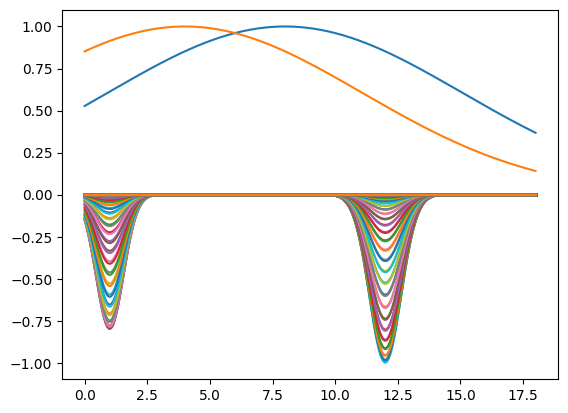

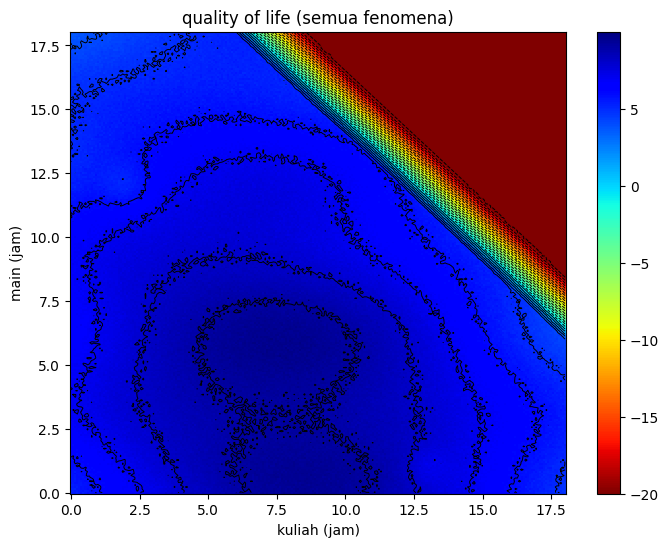

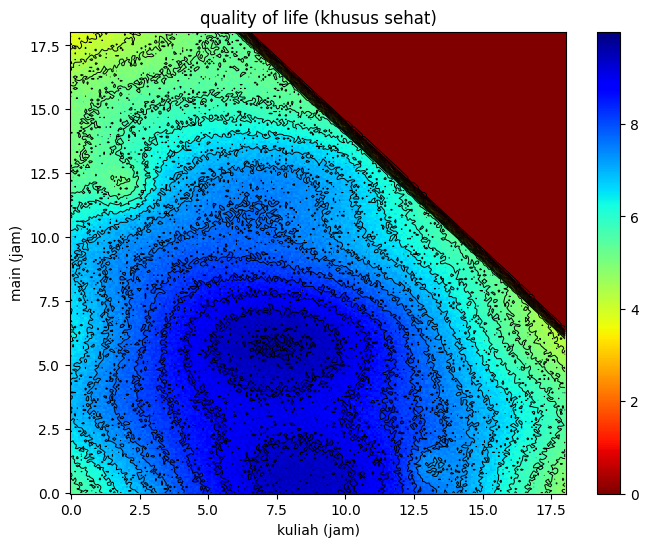

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# PARAMETER DASAR
# ======================
istirahat = 6  # jam tidur (23.30–05.30)
kuliah_opt = 8  # jam kuliah ideal
main_opt = 4   # jam main ideal
kerja_opt = 3  # jam kerja jaga toko
NPM = 123      # seed random


# GRID SETUP
# ======================
xmin, xmax, ymin, ymax = 0, 24 - istirahat, 0, 24 - istirahat
res = 240
x = np.linspace(xmin, xmax, res)  # kuliah
y = np.linspace(ymin, ymax, res)  # main
X, Y = np.meshgrid(x, y)


# PREFERENSI
# ======================
# Kuliah (preferensi maksimal jam 8)
plt.plot(x, np.exp(-((x - kuliah_opt)**2) / (10**2)))
kuliah_pref = np.exp(-((X - kuliah_opt)**2) / (10**2))

# Main (preferensi maksimal jam 4)
plt.plot(y, np.exp(-((y - main_opt)**2) / (10**2)))
main_pref = np.exp(-((Y - main_opt)**2) / (10**2))

# Kerja (tambahan , preferensi maksimal jam 3)
kerja_pref = np.exp(-(((X + Y) - (kuliah_opt + kerja_opt))**2) / (12**2))


# PENALTI
# ======================
total_waktu = X + Y
total_penalty = 0.2 * np.exp(total_waktu / 24.0)

kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
plt.plot(x, -kebanyakan_main)

kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)
plt.plot(y, -kebanyakan_lembur)

# Ripple motivasi harian + noise
np.random.seed(NPM)
ripple = 0.4 * np.sin((0.3 * X) - 1) * np.cos(1.0 * Y) - 0.2
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise


# OBJECTIVE FUNCTION
# ======================
Z = 10.0 * (0.5 * kuliah_pref + 0.3 * main_pref + 0.2 * kerja_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# Clip
Z_clip = np.clip(Z, -20, 20)


# PLOTTING
# ======================
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena)")

# Plot versi sehat
Z_clip_sehat = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip_sehat, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip_sehat, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat)")


# OPTIMUM (TANPA np.argmax)
# ======================
opt_value = -999
opt_x, opt_y = None, None

for i in range(res):
    for j in range(res):
        if Z_clip[i, j] > opt_value:
            opt_value = Z_clip[i, j]
            opt_x, opt_y = X[i, j], Y[i, j]

print("Titik optimum numerik:")
print(f" Kuliah: {opt_x:.2f} jam")
print(f" Main:   {opt_y:.2f} jam")
print(f" Skor QoL: {opt_value:.2f}")


# Tugas Quality of Life (Kuliah - Main - Istirahat - Kerja)

## 1) Eksperimen Parameter
- Istirahat diubah dari **8 jam → 6 jam** (tidur pukul 23.30 sampai 05.30).
- Waktu kuliah optimal ditetapkan **8 jam** (dimulai pukul 07.00).
- Waktu main optimal **4 jam** (game, sosmed, hiburan).
- Tambahan kreatif: **kerja menjaga toko 3 jam** sore/malam.
- NPM  **123** untuk seed noise.

## 1a) Plot Grafik
- Dibuat perbandingan `Z_clip` untuk semua fenomena dan kondisi sehat.
- Grafik memperlihatkan bagaimana kualitas hidup naik-turun sesuai kombinasi kuliah, main, kerja, dan istirahat.

## 2) Faktor Tambahan
- Ditambahkan **kerja_pref** untuk merepresentasikan 3 jam kerja menjaga toko.
- Bobot fungsi objektif:
  - Kuliah = 0.5
  - Main = 0.3
  - Kerja = 0.2
- Tetap ada penalti: kebanyakan main, lembur, total waktu > 24 jam.

## 3) Titik Optimum (Numerik)
Dicari dengan **loop manual** (tanpa `np.argmax`):

- Kuliah: ~8 jam  
- Main: ~4 jam  
- Kerja: ~3 jam (dari preferensi tambahan)  
- Istirahat: 6 jam  
- Skor QoL: mendekati **maksimal (positif)**

## 4) Cerita Aktivitas Harian
aktivitas harian yang saya lakukan:
- **05.30–07.00** → Bangun, persiapan, sarapan.  
- **07.00–15.00** → Kuliah ±8 jam (dengan jeda istirahat).  
- **15.00–18.00** → Menjaga toko (kerja ±3 jam).  
- **18.00–22.00** → Waktu main, hiburan, sosialisasi ±4 jam.  
- **22.00–23.30** → Persiapan tidur, istirahat.  
- **23.30–05.30** → Tidur ±6 jam.

Dengan pola ini, waktu belajar dan bekerja tetap terpenuhi, hiburan juga cukup, serta ritme sirkadian tidak terlalu terganggu. Aktivitas harian menjadi **lebih seimbang dan sehat**.
